___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 4<br><br>Classification with ANN<br><br>Cancer Data<br><h1>

# Keras Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from sklearn.datasets import load_breast_cancer
# sklearn dataseti. cancer hastalarının verilerinin tutulduğu veri setidir. 

In [4]:
cancer = load_breast_cancer()
# datasetini canser adlı değişkene atadık.

In [5]:
cancer.keys()
# her bir key altında datanın kendisi var.
# data = data nın kendisi
# target = target sutunu
# frame = tüm dataseti
# target_names = target colon adları
# DESCR = datada ki numaric verilerin describeleri

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(cancer['target_names'])

['malignant' 'benign']


In [ ]:
print(cancer["DESCR"])
# datasetinde ki futurelere baktık. sutunların ortalama, min, max değerleri var. describeden türetilmiş sklearn sözlüğü

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
cancer["feature_names"]
# sutun isimleri 

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
#@title
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.head()
# datanın kendisi ile future colon adlarını birleştridim. yani data sutun adlarına feature_names atandı.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [9]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_target.head()
# target datamızın sutunlarına yeni ad olarak oluşturduğumuz Cancer adını atadık.

,Cancer
0,0
1,0
2,0
3,0
4,0


In [10]:
frames = [df_feat, df_target]
df = pd.concat(frames,axis=1)
df.head()

# target ve futureleri birleştirdik.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,0


## Exploratory Data Analysis and Visualization

In [11]:
df.shape
# datasetimiz 31 sutun

(569, 31)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean fractal dimension,569.000,0.063,0.007,0.050,0.058,0.062,0.066,0.097


In [13]:
df.Cancer.value_counts()
# 1 sınıfı burda daha fazla. hasta olan 1 ler daha fazla. ınbalanced durumu yok değerler birbirlerine yakın.

1    357
0    212
Name: Cancer, dtype: int64

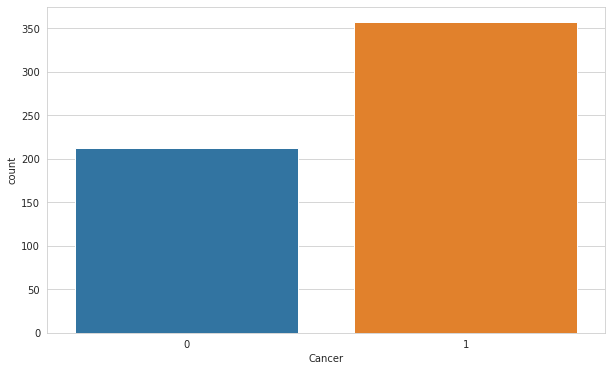

In [ ]:
sns.countplot(df["Cancer"])

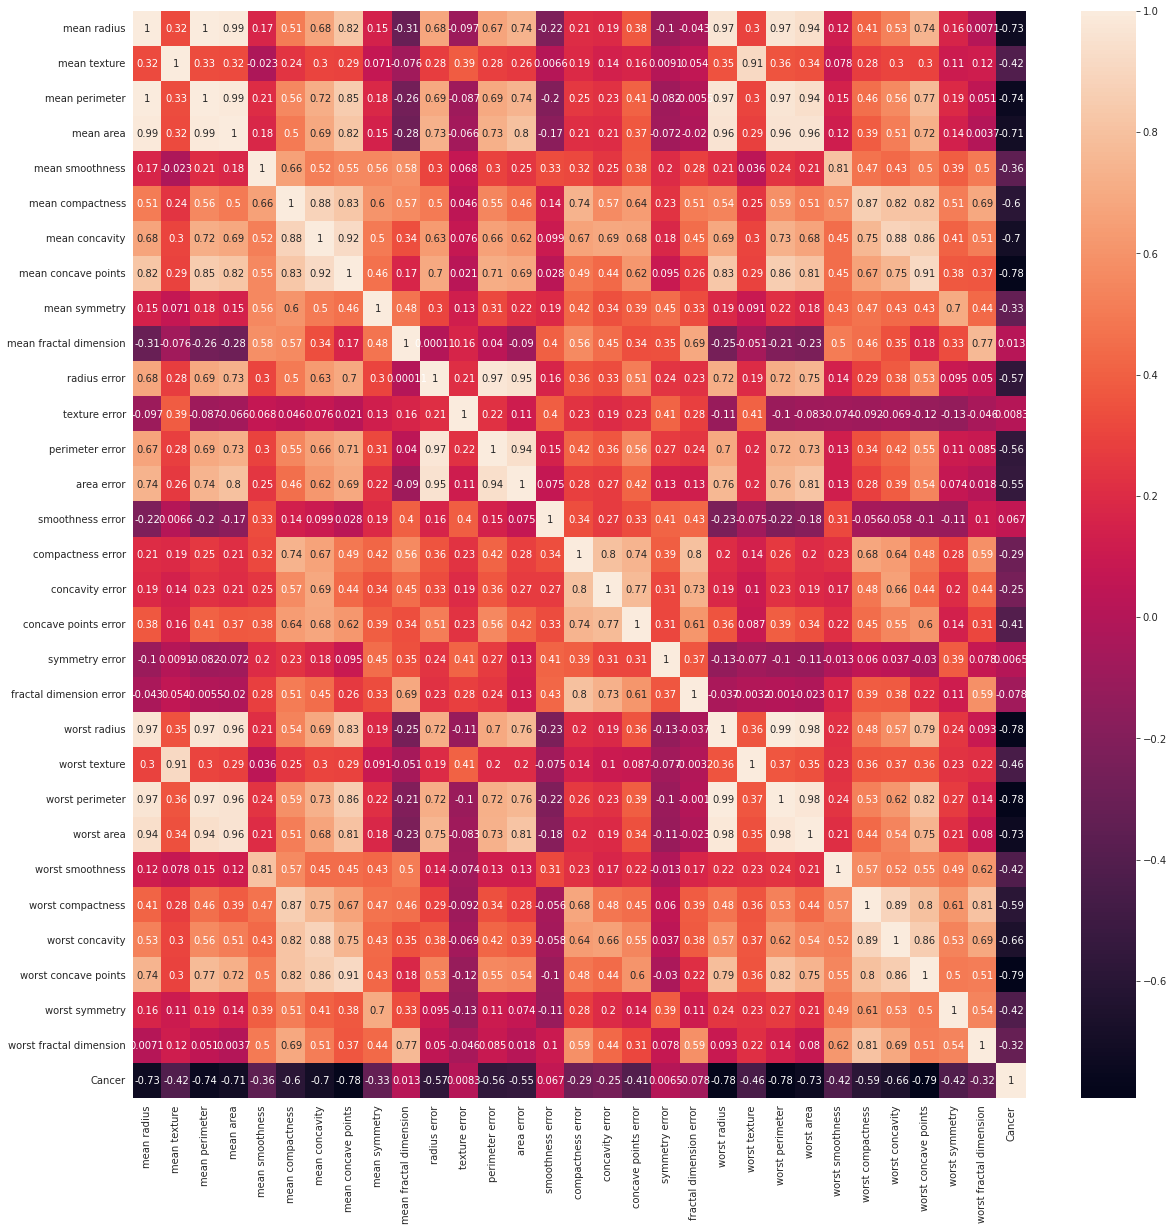

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [14]:
drop_list = ["worst perimeter", "worst area", "perimeter error", "area error", "mean perimeter", "mean area"]

In [15]:
df=df.drop(drop_list, axis=1)

In [16]:
df.shape

(569, 25)

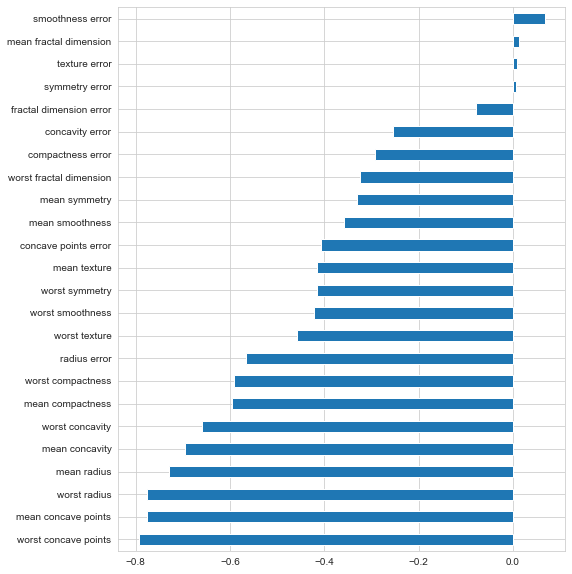

In [15]:
plt.figure(figsize = (8,10))
df.corr()['Cancer'].sort_values().drop("Cancer").plot(kind = "barh");
# kansere etki eden futureleri grafiksel olarak görmek için.

In [16]:
df.corr()['Cancer'].sort_values().drop("Cancer")

worst concave points      -0.794
mean concave points       -0.777
worst radius              -0.776
mean radius               -0.730
mean concavity            -0.696
worst concavity           -0.660
mean compactness          -0.597
worst compactness         -0.591
radius error              -0.567
worst texture             -0.457
worst smoothness          -0.421
worst symmetry            -0.416
mean texture              -0.415
concave points error      -0.408
mean smoothness           -0.359
mean symmetry             -0.330
worst fractal dimension   -0.324
compactness error         -0.293
concavity error           -0.254
fractal dimension error   -0.078
symmetry error             0.007
texture error              0.008
mean fractal dimension     0.013
smoothness error           0.067
Name: Cancer, dtype: float64

## Preprocessing of Data
- Train | Test Split, Scalling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # deep learningte en çok minmax kullanılır.

In [19]:
X = df.drop('Cancer', axis=1)
y = df['Cancer']

X = X.values
y = y.values
# deep learning için values alınır.

In [20]:
seed = 42

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = seed)
# stratify = y ınbalanced datalarda 0 ve 1 dengesini sağlar. ama bu data için çok gerekli değil. 

In [23]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling & Model Performance

In [24]:
import tensorflow as tf

In [23]:
tf.__version__

'2.8.0'

In [25]:
X_train.shape

(455, 24)

In [26]:
X_test.shape

(114, 24)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [28]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1])) # futre sayısının 1.5 katını koyduk.
model.add(Dense(24, activation="relu"))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation = "sigmoid")) # en son çıktı 0 ve 1 arasında olması için. çünkü target 0 ve 1 leden oluşmakta

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
# loss = binary_crossentropy dememizin sebebi eğer targette 2 tane class varsa kullanılması gerekmektedir. 
# metric olarakta ilk eğitim olduğu için accuracy dedik.

In [30]:
X_train_scaled.shape

(455, 24)

In [29]:
model.fit(x = X_train_scaled, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 1000, verbose=1)
# 32 satırdan oluşan, her satırda 32*13 = 416 tane değeri bulunan train datamızı eğit dedik. 
# her satır sonunda ağıtlık ve bias değerleri güncellenir ve satırlar ilerledikçe eğitim sayısıda artacaktır. 1000/32 = yi
# satırlara dağıtacağı için.  burda yine validation_split için %15 ayır dedik.

Epoch 1/1000
13/13 [==============================] - 1s 25ms/step - loss: 0.6871 - accuracy: 0.6373 - val_loss: 0.6817 - val_accuracy: 0.5652
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6560 - accuracy: 0.6373 - val_loss: 0.6534 - val_accuracy: 0.5652
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6108 - accuracy: 0.6554 - val_loss: 0.6136 - val_accuracy: 0.5942
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5584 - accuracy: 0.6995 - val_loss: 0.5629 - val_accuracy: 0.7391
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5084 - accuracy: 0.8394 - val_loss: 0.5230 - val_accuracy: 0.7391
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4495 - accuracy: 0.8420 - val_loss: 0.4611 - val_accuracy: 0.7826
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3915 - accuracy: 0.8782 - val_loss: 0.4001 - val_accuracy: 0.8696
Epoch

13/13 [==============================] - 0s 5ms/step - loss: 0.0499 - accuracy: 0.9819 - val_loss: 0.0376 - val_accuracy: 1.0000
Epoch 59/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 0.9845 - val_loss: 0.0531 - val_accuracy: 0.9855
Epoch 60/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1143 - accuracy: 0.9585 - val_loss: 0.1043 - val_accuracy: 0.9420
Epoch 61/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0676 - accuracy: 0.9793 - val_loss: 0.0566 - val_accuracy: 0.9855
Epoch 62/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0488 - accuracy: 0.9819 - val_loss: 0.0509 - val_accuracy: 0.9710
Epoch 63/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0412 - accuracy: 0.9845 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 64/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 0.9819 - val_loss: 0.0437 - val_accuracy: 0.9855
Epoch 65/1000

13/13 [==============================] - 0s 5ms/step - loss: 0.0252 - accuracy: 0.9870 - val_loss: 0.0285 - val_accuracy: 0.9855
Epoch 116/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0431 - accuracy: 0.9819 - val_loss: 0.0432 - val_accuracy: 0.9855
Epoch 117/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0371 - accuracy: 0.9845 - val_loss: 0.0539 - val_accuracy: 0.9710
Epoch 118/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0534 - accuracy: 0.9819 - val_loss: 0.1118 - val_accuracy: 0.9420
Epoch 119/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0578 - accuracy: 0.9741 - val_loss: 0.0453 - val_accuracy: 0.9710
Epoch 120/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.9870 - val_loss: 0.0278 - val_accuracy: 0.9855
Epoch 121/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0353 - accuracy: 0.9896 - val_loss: 0.0263 - val_accuracy: 1.0000
Epoch 1

Epoch 172/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1105 - accuracy: 0.9585 - val_loss: 0.1086 - val_accuracy: 0.9420
Epoch 173/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0499 - accuracy: 0.9819 - val_loss: 0.1784 - val_accuracy: 0.9275
Epoch 174/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0649 - accuracy: 0.9741 - val_loss: 0.0310 - val_accuracy: 0.9855
Epoch 175/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0229 - accuracy: 0.9922 - val_loss: 0.0269 - val_accuracy: 1.0000
Epoch 176/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.9974 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 177/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.9896 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 178/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0222 - accuracy: 0.9922 - val_loss: 0.0154 - val_accuracy:

Epoch 229/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 230/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.9948 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 231/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0165 - accuracy: 0.9922 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 232/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0145 - accuracy: 0.9922 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 233/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0131 - accuracy: 0.9948 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 234/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0138 - accuracy: 0.9974 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 235/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 0.9948 - val_loss: 0.0147 - val_accuracy:

Epoch 286/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 0.9948 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 287/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0138 - accuracy: 0.9922 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 288/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0121 - accuracy: 0.9948 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 289/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 290/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 0.9948 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 291/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0107 - accuracy: 0.9974 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 292/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0127 - accuracy: 0.9948 - val_loss: 0.0149 - val_accuracy:

Epoch 343/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 0.9948 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 344/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.9948 - val_loss: 0.0456 - val_accuracy: 0.9565
Epoch 345/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 346/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0124 - accuracy: 0.9974 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 347/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 348/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 349/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0100 - accuracy: 0.9922 - val_loss: 0.0142 - val_accuracy:

Epoch 400/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 401/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 402/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 403/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 0.9948 - val_loss: 0.0894 - val_accuracy: 0.9565
Epoch 404/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0163 - val_accuracy: 0.9855
Epoch 405/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 0.9974 - val_loss: 0.0153 - val_accuracy: 0.9855
Epoch 406/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0061 - accuracy: 0.9974 - val_loss: 0.0062 - val_accuracy:

Epoch 457/1000
13/13 [==============================] - 0s 5ms/step - loss: 9.5152e-04 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 458/1000
13/13 [==============================] - 0s 5ms/step - loss: 9.6439e-04 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 459/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 0.9855
Epoch 460/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 461/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 462/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0799 - accuracy: 0.9767 - val_loss: 0.2418 - val_accuracy: 0.9275
Epoch 463/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0747 - accuracy: 0.9870 - val_loss: 0.1292 - val_a

13/13 [==============================] - 0s 5ms/step - loss: 6.3386e-04 - accuracy: 1.0000 - val_loss: 0.0178 - val_accuracy: 0.9855
Epoch 514/1000
13/13 [==============================] - 0s 5ms/step - loss: 6.9775e-04 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 0.9855
Epoch 515/1000
13/13 [==============================] - 0s 5ms/step - loss: 6.6449e-04 - accuracy: 1.0000 - val_loss: 0.0180 - val_accuracy: 0.9855
Epoch 516/1000
13/13 [==============================] - 0s 5ms/step - loss: 6.2057e-04 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 0.9855
Epoch 517/1000
13/13 [==============================] - 0s 5ms/step - loss: 7.4371e-04 - accuracy: 1.0000 - val_loss: 0.0166 - val_accuracy: 0.9855
Epoch 518/1000
13/13 [==============================] - 0s 6ms/step - loss: 6.2328e-04 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 0.9855
Epoch 519/1000
13/13 [==============================] - 0s 5ms/step - loss: 5.9948e-04 - accuracy: 1.0000 - val_loss: 0.0149 - 

13/13 [==============================] - 0s 5ms/step - loss: 3.9382e-04 - accuracy: 1.0000 - val_loss: 0.0196 - val_accuracy: 0.9855
Epoch 569/1000
13/13 [==============================] - 0s 6ms/step - loss: 4.2201e-04 - accuracy: 1.0000 - val_loss: 0.0163 - val_accuracy: 0.9855
Epoch 570/1000
13/13 [==============================] - 0s 6ms/step - loss: 3.5409e-04 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 0.9855
Epoch 571/1000
13/13 [==============================] - 0s 6ms/step - loss: 3.8500e-04 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 0.9855
Epoch 572/1000
13/13 [==============================] - 0s 5ms/step - loss: 3.3749e-04 - accuracy: 1.0000 - val_loss: 0.0196 - val_accuracy: 0.9855
Epoch 573/1000
13/13 [==============================] - 0s 5ms/step - loss: 3.3954e-04 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 0.9855
Epoch 574/1000
13/13 [==============================] - 0s 6ms/step - loss: 3.6439e-04 - accuracy: 1.0000 - val_loss: 0.0180 - 

13/13 [==============================] - 0s 5ms/step - loss: 5.8851e-04 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 625/1000
13/13 [==============================] - 0s 5ms/step - loss: 5.7725e-04 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 0.9855
Epoch 626/1000
13/13 [==============================] - 0s 5ms/step - loss: 5.6547e-04 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 0.9855
Epoch 627/1000
13/13 [==============================] - 0s 5ms/step - loss: 5.7814e-04 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 0.9855
Epoch 628/1000
13/13 [==============================] - 0s 5ms/step - loss: 5.5867e-04 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 0.9855
Epoch 629/1000
13/13 [==============================] - 0s 5ms/step - loss: 5.5767e-04 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 630/1000
13/13 [==============================] - 0s 5ms/step - loss: 5.4149e-04 - accuracy: 1.0000 - val_loss: 0.0122 - 

13/13 [==============================] - 0s 5ms/step - loss: 3.1448e-04 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 0.9855
Epoch 680/1000
13/13 [==============================] - 0s 5ms/step - loss: 3.1401e-04 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 0.9855
Epoch 681/1000
13/13 [==============================] - 0s 5ms/step - loss: 3.4414e-04 - accuracy: 1.0000 - val_loss: 0.0187 - val_accuracy: 0.9855
Epoch 682/1000
13/13 [==============================] - 0s 5ms/step - loss: 3.1157e-04 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 0.9855
Epoch 683/1000
13/13 [==============================] - 0s 5ms/step - loss: 3.1319e-04 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9855
Epoch 684/1000
13/13 [==============================] - 0s 5ms/step - loss: 2.9270e-04 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 0.9855
Epoch 685/1000
13/13 [==============================] - 0s 5ms/step - loss: 3.0680e-04 - accuracy: 1.0000 - val_loss: 0.0180 - 

13/13 [==============================] - 0s 5ms/step - loss: 1.7723e-04 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9855
Epoch 735/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.8861e-04 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 0.9855
Epoch 736/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.6765e-04 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 0.9855
Epoch 737/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.7069e-04 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9855
Epoch 738/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.7607e-04 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 0.9855
Epoch 739/1000
13/13 [==============================] - 0s 5ms/step - loss: 2.5492e-04 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 0.9855
Epoch 740/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.9869e-04 - accuracy: 1.0000 - val_loss: 0.0352 - 

13/13 [==============================] - 0s 6ms/step - loss: 3.4362e-04 - accuracy: 1.0000 - val_loss: 0.0163 - val_accuracy: 0.9855
Epoch 790/1000
13/13 [==============================] - 0s 5ms/step - loss: 2.1381e-04 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy: 0.9855
Epoch 791/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.4727e-04 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 0.9855
Epoch 792/1000
13/13 [==============================] - 0s 4ms/step - loss: 1.8891e-04 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 0.9855
Epoch 793/1000
13/13 [==============================] - 0s 5ms/step - loss: 2.0251e-04 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 0.9855
Epoch 794/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.2678e-04 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 0.9855
Epoch 795/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.3253e-04 - accuracy: 1.0000 - val_loss: 0.0202 - 

13/13 [==============================] - 0s 5ms/step - loss: 5.6928e-05 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 0.9855
Epoch 845/1000
13/13 [==============================] - 0s 5ms/step - loss: 5.6474e-05 - accuracy: 1.0000 - val_loss: 0.0369 - val_accuracy: 0.9855
Epoch 846/1000
13/13 [==============================] - 0s 5ms/step - loss: 5.6493e-05 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 0.9855
Epoch 847/1000
13/13 [==============================] - 0s 5ms/step - loss: 5.9045e-05 - accuracy: 1.0000 - val_loss: 0.0396 - val_accuracy: 0.9855
Epoch 848/1000
13/13 [==============================] - 0s 5ms/step - loss: 5.5500e-05 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 0.9855
Epoch 849/1000
13/13 [==============================] - 0s 5ms/step - loss: 5.4993e-05 - accuracy: 1.0000 - val_loss: 0.0382 - val_accuracy: 0.9855
Epoch 850/1000
13/13 [==============================] - 0s 5ms/step - loss: 5.8322e-05 - accuracy: 1.0000 - val_loss: 0.0369 - 

13/13 [==============================] - 0s 6ms/step - loss: 3.6917e-05 - accuracy: 1.0000 - val_loss: 0.0405 - val_accuracy: 0.9855
Epoch 900/1000
13/13 [==============================] - 0s 5ms/step - loss: 3.6659e-05 - accuracy: 1.0000 - val_loss: 0.0400 - val_accuracy: 0.9855
Epoch 901/1000
13/13 [==============================] - 0s 5ms/step - loss: 3.8077e-05 - accuracy: 1.0000 - val_loss: 0.0416 - val_accuracy: 0.9855
Epoch 902/1000
13/13 [==============================] - 0s 5ms/step - loss: 3.7629e-05 - accuracy: 1.0000 - val_loss: 0.0391 - val_accuracy: 0.9855
Epoch 903/1000
13/13 [==============================] - 0s 4ms/step - loss: 3.7091e-05 - accuracy: 1.0000 - val_loss: 0.0402 - val_accuracy: 0.9855
Epoch 904/1000
13/13 [==============================] - 0s 5ms/step - loss: 4.0178e-05 - accuracy: 1.0000 - val_loss: 0.0344 - val_accuracy: 0.9855
Epoch 905/1000
13/13 [==============================] - 0s 5ms/step - loss: 3.7081e-05 - accuracy: 1.0000 - val_loss: 0.0384 - 

13/13 [==============================] - 0s 5ms/step - loss: 2.5525e-05 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 0.9855
Epoch 955/1000
13/13 [==============================] - 0s 5ms/step - loss: 2.4555e-05 - accuracy: 1.0000 - val_loss: 0.0431 - val_accuracy: 0.9855
Epoch 956/1000
13/13 [==============================] - 0s 5ms/step - loss: 2.4443e-05 - accuracy: 1.0000 - val_loss: 0.0421 - val_accuracy: 0.9855
Epoch 957/1000
13/13 [==============================] - 0s 4ms/step - loss: 2.3897e-05 - accuracy: 1.0000 - val_loss: 0.0423 - val_accuracy: 0.9855
Epoch 958/1000
13/13 [==============================] - 0s 5ms/step - loss: 2.3742e-05 - accuracy: 1.0000 - val_loss: 0.0419 - val_accuracy: 0.9855
Epoch 959/1000
13/13 [==============================] - 0s 5ms/step - loss: 2.5074e-05 - accuracy: 1.0000 - val_loss: 0.0409 - val_accuracy: 0.9855
Epoch 960/1000
13/13 [==============================] - 0s 5ms/step - loss: 2.2967e-05 - accuracy: 1.0000 - val_loss: 0.0436 - 

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 36)                900       
                                                                 
 dense_26 (Dense)            (None, 18)                666       
                                                                 
 dense_27 (Dense)            (None, 9)                 171       
                                                                 
 dense_28 (Dense)            (None, 4)                 40        
                                                                 
 dense_29 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,782
Trainable params: 1,782
Non-trainable params: 0
_________________________________________________________________


In [31]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()
# ilk 5 satır için datanın %15 lik kısmının alınmadan ve %15 lik kısmı eklenerek ayrılan dataların loss, accuracy ve val_loss,
# val_accuracy skorları

,loss,accuracy,val_loss,val_accuracy
0,0.687,0.637,0.682,0.565
1,0.656,0.637,0.653,0.565
2,0.611,0.655,0.614,0.594
3,0.558,0.699,0.563,0.739
4,0.508,0.839,0.523,0.739


In [33]:
loss_df[(loss_df["accuracy"] == loss_df["accuracy"].max()) & (loss_df["val_accuracy"] == loss_df["val_accuracy"].max())]

,loss,accuracy,val_loss,val_accuracy
228,0.014,1.000,0.015,1.000
235,0.013,1.000,0.015,1.000
238,0.012,1.000,0.013,1.000
243,0.012,1.000,0.015,1.000
251,0.011,1.000,0.012,1.000
...,...,...,...,...
622,0.001,1.000,0.010,1.000
623,0.001,1.000,0.011,1.000
628,0.001,1.000,0.011,1.000
786,0.002,1.000,0.003,1.000


In [34]:
acc_max = loss_df[(loss_df["accuracy"] == loss_df["accuracy"].max()) & (loss_df["val_accuracy"] == loss_df["val_accuracy"].max())]
acc_max[(acc_max["loss"] == acc_max["loss"].min()) | (acc_max["val_loss"] == acc_max["val_loss"].min())]

,loss,accuracy,val_loss,val_accuracy
580,0.000,1.000,0.011,1.000
786,0.002,1.000,0.003,1.000


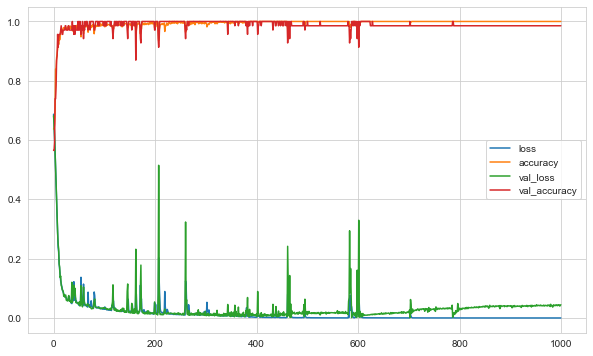

In [35]:
loss_df.plot();
# epoch 640 dan sonra skorlar birbirlerine yaklaşmaya skorlar dengeye oturmaya başlamış, 800 den sonra overfite geçmeye başlamış.

In [37]:
model.evaluate(X_test_scaled, y_test, verbose=0)
# test datamız için ilk değerimiz test datamız için loss değerimiz, 2. skor ise bizim test için accuarcy skoru.

[0.26489076018333435, 0.9473684430122375]

In [38]:
loss, recall = model.evaluate(X_test_scaled, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.26489076018333435
recall :  0.9473684430122375


In [46]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix, classification_report

y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32") # 0.5 ten büyük değerleri 1, küçük değerleri 0 yap diyoruz.

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 0 değerinden 40 tanesi 0, 4 tanesi 1 olarak, 1 değerinden 2 tanesini 0, 68 tanesini 1 olarak doğru bilmişiz.

[[40  2]
 [ 4 68]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



### EarlyStopping

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
# callbacks içinden import ettik.

In [55]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train_scaled.shape[1]))
model.add(Dense(units= 24, activation="relu"))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation = "sigmoid")) # output 0 ve 1 lerden oluşsun diye sigmoid verdik.

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [69]:
#The patience is often set somewhere between 10 and 100 (10 or 25 is more common), 
#but it really depends on your dataset and network.

In [56]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)
# val_loss değerini takip et dedik. öğrenme bittiği val_loss sabitlendiği satırdan 15 satır ilerle ve epoch bitir demek.

In [57]:
model.fit(x = X_train_scaled, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

# 91. eğitimden sonra bitirmiş.

Epoch 1/1000
13/13 [==============================] - 1s 19ms/step - loss: 0.6871 - accuracy: 0.6373 - val_loss: 0.6817 - val_accuracy: 0.5652
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.6560 - accuracy: 0.6373 - val_loss: 0.6534 - val_accuracy: 0.5652
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.6108 - accuracy: 0.6554 - val_loss: 0.6136 - val_accuracy: 0.5942
Epoch 4/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.5584 - accuracy: 0.6995 - val_loss: 0.5629 - val_accuracy: 0.7391
Epoch 5/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.5084 - accuracy: 0.8394 - val_loss: 0.5230 - val_accuracy: 0.7391
Epoch 6/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4495 - accuracy: 0.8420 - val_loss: 0.4611 - val_accuracy: 0.7826
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.3915 - accuracy: 0.8782 - val_loss: 0.4001 - val_accuracy: 0.8696
Epoch

13/13 [==============================] - 0s 5ms/step - loss: 0.0499 - accuracy: 0.9819 - val_loss: 0.0376 - val_accuracy: 1.0000
Epoch 59/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0423 - accuracy: 0.9845 - val_loss: 0.0531 - val_accuracy: 0.9855
Epoch 60/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1143 - accuracy: 0.9585 - val_loss: 0.1043 - val_accuracy: 0.9420
Epoch 61/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0676 - accuracy: 0.9793 - val_loss: 0.0566 - val_accuracy: 0.9855
Epoch 62/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0488 - accuracy: 0.9819 - val_loss: 0.0509 - val_accuracy: 0.9710
Epoch 63/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0412 - accuracy: 0.9845 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 64/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 0.9819 - val_loss: 0.0437 - val_accuracy: 0.9855
Epoch 65/1000

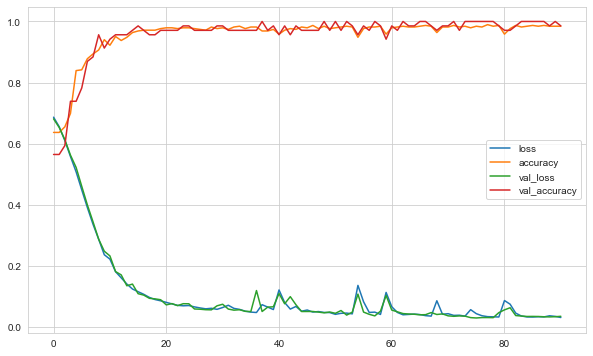

In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [61]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.0950440913438797
accuracy :  0.9649122953414917


In [60]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# skorlar düzeldi.

[[40  2]
 [ 2 70]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



#### uyarı : 

weighted avg targette en çok hangi class varsa o classın skorunu ön plana çıkarmaktadır. 

ama bizim için az olan classın değerini ön plana çıkarmak istersek macro avg daha çok önerilmektedir.

### learning_rate

In [62]:
from tensorflow.keras.optimizers import Adam
# learning_rate belirlemek adına yaptık.

In [63]:
model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train_scaled.shape[1]))
model.add(Dense(24, activation="relu"))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005) # learning_rate yi 0.005 olarak verdik. default değerimiz 0.001 dir. 

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [64]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

# val_loss skorunda azalma olmassa 15 satır sonra eğitimi sonlandır dedik.

In [65]:
model.fit(x = X_train_scaled, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
13/13 [==============================] - 1s 20ms/step - loss: 0.5992 - accuracy: 0.7228 - val_loss: 0.5038 - val_accuracy: 0.7826
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.4075 - accuracy: 0.8731 - val_loss: 0.3401 - val_accuracy: 0.8406
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2462 - accuracy: 0.9171 - val_loss: 0.2047 - val_accuracy: 0.9420
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1525 - accuracy: 0.9404 - val_loss: 0.1802 - val_accuracy: 0.9130
Epoch 5/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1228 - accuracy: 0.9482 - val_loss: 0.1194 - val_accuracy: 0.9420
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0958 - accuracy: 0.9560 - val_loss: 0.1952 - val_accuracy: 0.9275
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0942 - accuracy: 0.9611 - val_loss: 0.1783 - val_accuracy: 0.9420
Epoch

<AxesSubplot:>

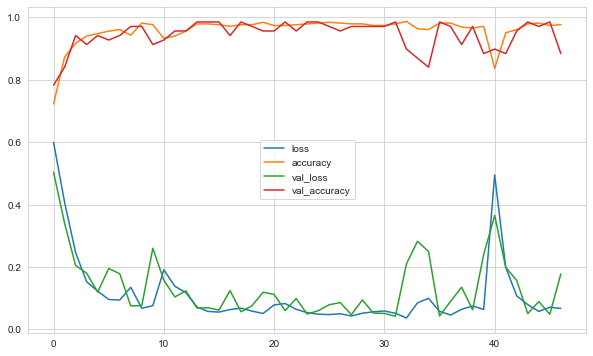

In [66]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [67]:
loss, recall = model.evaluate(X_test_scaled, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", accuracy)

loss :  0.2566699683666229
recall :  0.9649122953414917


In [68]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# learning rate artışı skorları berbat etti. 

[[42  0]
 [14 58]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        42
           1       1.00      0.81      0.89        72

    accuracy                           0.88       114
   macro avg       0.88      0.90      0.87       114
weighted avg       0.91      0.88      0.88       114



### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [70]:
from tensorflow.keras.layers import Dropout

In [71]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train_scaled.shape[1]))
Dropout(0.4)
model.add(Dense(24, activation = "relu"))
Dropout(0.35)
model.add(Dense(18, activation = "relu"))
Dropout(0.3)
model.add(Dense(9, activation="relu"))
Dropout(0.15)
model.add(Dense(5, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation = "sigmoid"))


opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [72]:
model.fit(x = X_train_scaled, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
13/13 [==============================] - 1s 21ms/step - loss: 0.6915 - accuracy: 0.7848 - val_loss: 0.6897 - val_accuracy: 0.9130
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.6869 - accuracy: 0.9267 - val_loss: 0.6848 - val_accuracy: 0.9130
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.6808 - accuracy: 0.9315 - val_loss: 0.6755 - val_accuracy: 0.8696
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6710 - accuracy: 0.9046 - val_loss: 0.6589 - val_accuracy: 0.7826
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6539 - accuracy: 0.8875 - val_loss: 0.6313 - val_accuracy: 0.7609
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6265 - accuracy: 0.8117 - val_loss: 0.5923 - val_accuracy: 0.8261
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5931 - accuracy: 0.8337 - val_loss: 0.5410 - val_accuracy: 0.8043
Epoch

13/13 [==============================] - 0s 5ms/step - loss: 0.2660 - accuracy: 0.9878 - val_loss: 0.2342 - val_accuracy: 0.9565
Epoch 59/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.2862 - accuracy: 0.9707 - val_loss: 0.2524 - val_accuracy: 0.9565
Epoch 60/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2704 - accuracy: 0.9829 - val_loss: 0.2238 - val_accuracy: 0.9783
Epoch 61/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2666 - accuracy: 0.9829 - val_loss: 0.2292 - val_accuracy: 0.9783
Epoch 62/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2589 - accuracy: 0.9927 - val_loss: 0.2074 - val_accuracy: 1.0000
Epoch 63/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2552 - accuracy: 0.9878 - val_loss: 0.1980 - val_accuracy: 1.0000
Epoch 64/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.2532 - accuracy: 0.9878 - val_loss: 0.1954 - val_accuracy: 1.0000
Epoch 65/1000

13/13 [==============================] - 0s 5ms/step - loss: 0.1915 - accuracy: 0.9780 - val_loss: 0.1518 - val_accuracy: 0.9783
Epoch 116/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1670 - accuracy: 0.9902 - val_loss: 0.1569 - val_accuracy: 0.9783
Epoch 117/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1763 - accuracy: 0.9853 - val_loss: 0.1413 - val_accuracy: 0.9783
Epoch 118/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1689 - accuracy: 0.9878 - val_loss: 0.1233 - val_accuracy: 1.0000
Epoch 119/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1644 - accuracy: 0.9902 - val_loss: 0.1270 - val_accuracy: 1.0000
Epoch 120/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1613 - accuracy: 0.9902 - val_loss: 0.1210 - val_accuracy: 1.0000
Epoch 121/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.1601 - accuracy: 0.9927 - val_loss: 0.1235 - val_accuracy: 1.0000
Epoch 1

Epoch 172/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1143 - accuracy: 0.9927 - val_loss: 0.1109 - val_accuracy: 0.9783
Epoch 173/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1140 - accuracy: 0.9927 - val_loss: 0.0914 - val_accuracy: 1.0000
Epoch 174/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1130 - accuracy: 0.9927 - val_loss: 0.1104 - val_accuracy: 0.9783
Epoch 175/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1125 - accuracy: 0.9927 - val_loss: 0.0984 - val_accuracy: 0.9783
Epoch 176/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1117 - accuracy: 0.9927 - val_loss: 0.1180 - val_accuracy: 0.9783
Epoch 177/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1111 - accuracy: 0.9927 - val_loss: 0.1075 - val_accuracy: 0.9783
Epoch 178/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.1105 - accuracy: 0.9927 - val_loss: 0.0978 - val_accuracy:

Epoch 229/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0880 - accuracy: 0.9878 - val_loss: 0.0553 - val_accuracy: 1.0000
Epoch 230/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0881 - accuracy: 0.9927 - val_loss: 0.0563 - val_accuracy: 1.0000
Epoch 231/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0937 - accuracy: 0.9853 - val_loss: 0.0537 - val_accuracy: 1.0000
Epoch 232/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0915 - accuracy: 0.9902 - val_loss: 0.0528 - val_accuracy: 1.0000
Epoch 233/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0873 - accuracy: 0.9927 - val_loss: 0.0523 - val_accuracy: 1.0000
Epoch 234/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0834 - accuracy: 0.9927 - val_loss: 0.0592 - val_accuracy: 1.0000
Epoch 235/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0861 - accuracy: 0.9902 - val_loss: 0.0538 - val_accuracy:

Epoch 286/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0673 - accuracy: 0.9927 - val_loss: 0.0513 - val_accuracy: 1.0000
Epoch 287/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0671 - accuracy: 0.9927 - val_loss: 0.0510 - val_accuracy: 1.0000
Epoch 288/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0668 - accuracy: 0.9927 - val_loss: 0.0611 - val_accuracy: 1.0000
Epoch 289/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0665 - accuracy: 0.9927 - val_loss: 0.0698 - val_accuracy: 0.9565
Epoch 290/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0663 - accuracy: 0.9927 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 291/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0661 - accuracy: 0.9927 - val_loss: 0.0578 - val_accuracy: 1.0000
Epoch 292/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0658 - accuracy: 0.9927 - val_loss: 0.0620 - val_accuracy:

Epoch 343/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0564 - accuracy: 0.9927 - val_loss: 0.0566 - val_accuracy: 0.9565
Epoch 344/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0562 - accuracy: 0.9927 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 345/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0561 - accuracy: 0.9927 - val_loss: 0.0588 - val_accuracy: 0.9565
Epoch 346/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0559 - accuracy: 0.9927 - val_loss: 0.0680 - val_accuracy: 0.9565
Epoch 347/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0557 - accuracy: 0.9927 - val_loss: 0.0554 - val_accuracy: 0.9565
Epoch 348/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0556 - accuracy: 0.9927 - val_loss: 0.0565 - val_accuracy: 0.9565
Epoch 349/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0555 - accuracy: 0.9927 - val_loss: 0.0636 - val_accuracy:

Epoch 400/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0496 - accuracy: 0.9927 - val_loss: 0.0477 - val_accuracy: 0.9783
Epoch 401/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0495 - accuracy: 0.9927 - val_loss: 0.0574 - val_accuracy: 0.9565
Epoch 402/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0494 - accuracy: 0.9927 - val_loss: 0.0677 - val_accuracy: 0.9565
Epoch 403/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0493 - accuracy: 0.9927 - val_loss: 0.0747 - val_accuracy: 0.9565
Epoch 404/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0492 - accuracy: 0.9927 - val_loss: 0.0783 - val_accuracy: 0.9565
Epoch 405/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0491 - accuracy: 0.9927 - val_loss: 0.0666 - val_accuracy: 0.9565
Epoch 406/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0490 - accuracy: 0.9927 - val_loss: 0.0480 - val_accuracy:

Epoch 457/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0454 - accuracy: 0.9927 - val_loss: 0.0813 - val_accuracy: 0.9565
Epoch 458/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0454 - accuracy: 0.9927 - val_loss: 0.0508 - val_accuracy: 0.9783
Epoch 459/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0453 - accuracy: 0.9927 - val_loss: 0.0536 - val_accuracy: 0.9783
Epoch 460/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0453 - accuracy: 0.9927 - val_loss: 0.0605 - val_accuracy: 0.9565
Epoch 461/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0452 - accuracy: 0.9927 - val_loss: 0.0706 - val_accuracy: 0.9565
Epoch 462/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0452 - accuracy: 0.9927 - val_loss: 0.0765 - val_accuracy: 0.9565
Epoch 463/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0451 - accuracy: 0.9927 - val_loss: 0.0825 - val_accuracy:

Epoch 514/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0430 - accuracy: 0.9927 - val_loss: 0.0752 - val_accuracy: 0.9565
Epoch 515/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9927 - val_loss: 0.0778 - val_accuracy: 0.9565
Epoch 516/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9927 - val_loss: 0.0410 - val_accuracy: 0.9783
Epoch 517/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9927 - val_loss: 0.0325 - val_accuracy: 1.0000
Epoch 518/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9927 - val_loss: 0.0554 - val_accuracy: 0.9565
Epoch 519/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0428 - accuracy: 0.9927 - val_loss: 0.0694 - val_accuracy: 0.9565
Epoch 520/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0428 - accuracy: 0.9927 - val_loss: 0.0754 - val_accuracy:

Epoch 571/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0416 - accuracy: 0.9927 - val_loss: 0.0450 - val_accuracy: 0.9783
Epoch 572/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0416 - accuracy: 0.9927 - val_loss: 0.0486 - val_accuracy: 0.9783
Epoch 573/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0416 - accuracy: 0.9927 - val_loss: 0.0592 - val_accuracy: 0.9565
Epoch 574/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0415 - accuracy: 0.9927 - val_loss: 0.0688 - val_accuracy: 0.9565
Epoch 575/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0415 - accuracy: 0.9927 - val_loss: 0.0758 - val_accuracy: 0.9565
Epoch 576/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0415 - accuracy: 0.9927 - val_loss: 0.0808 - val_accuracy: 0.9565
Epoch 577/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0415 - accuracy: 0.9927 - val_loss: 0.0857 - val_accuracy:

Epoch 628/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0422 - accuracy: 0.9902 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 629/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0458 - accuracy: 0.9927 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 630/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0398 - accuracy: 0.9902 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 631/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0370 - accuracy: 0.9927 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 632/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0383 - accuracy: 0.9927 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 633/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.9951 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 634/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.9951 - val_loss: 0.0119 - val_accuracy:

Epoch 685/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0313 - accuracy: 0.9951 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 686/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0311 - accuracy: 0.9951 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 687/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0312 - accuracy: 0.9951 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 688/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0315 - accuracy: 0.9951 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 689/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0315 - accuracy: 0.9951 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 690/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.9927 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 691/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0355 - accuracy: 0.9927 - val_loss: 0.0209 - val_accuracy:

Epoch 742/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 0.9951 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 743/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0299 - accuracy: 0.9951 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 744/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.9951 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 745/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0297 - accuracy: 0.9951 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 746/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0297 - accuracy: 0.9951 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 747/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 0.9951 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 748/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0297 - accuracy: 0.9951 - val_loss: 0.0150 - val_accuracy:

Epoch 799/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.9951 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 800/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.9951 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 801/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.9951 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 802/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0292 - accuracy: 0.9951 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 803/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.9951 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 804/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.9951 - val_loss: 0.0180 - val_accuracy: 1.0000
Epoch 805/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0292 - accuracy: 0.9951 - val_loss: 0.0162 - val_accuracy:

Epoch 856/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0290 - accuracy: 0.9951 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 857/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.0291 - accuracy: 0.9951 - val_loss: 0.0216 - val_accuracy: 0.9783
Epoch 858/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0290 - accuracy: 0.9951 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 859/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0291 - accuracy: 0.9951 - val_loss: 0.0206 - val_accuracy: 0.9783
Epoch 860/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0290 - accuracy: 0.9951 - val_loss: 0.0203 - val_accuracy: 0.9783
Epoch 861/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9951 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 862/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9951 - val_loss: 0.0198 - val_accuracy:

Epoch 913/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0289 - accuracy: 0.9951 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 914/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.9951 - val_loss: 0.0243 - val_accuracy: 0.9783
Epoch 915/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9951 - val_loss: 0.0219 - val_accuracy: 0.9783
Epoch 916/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.9951 - val_loss: 0.0226 - val_accuracy: 0.9783
Epoch 917/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9951 - val_loss: 0.0243 - val_accuracy: 0.9783
Epoch 918/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.9951 - val_loss: 0.0220 - val_accuracy: 0.9783
Epoch 919/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.9951 - val_loss: 0.0264 - val_accuracy:

Epoch 970/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.9951 - val_loss: 0.0247 - val_accuracy: 0.9783
Epoch 971/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.9951 - val_loss: 0.0274 - val_accuracy: 0.9783
Epoch 972/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.9951 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 973/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.9951 - val_loss: 0.0217 - val_accuracy: 0.9783
Epoch 974/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.9951 - val_loss: 0.0289 - val_accuracy: 0.9783
Epoch 975/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.9951 - val_loss: 0.0332 - val_accuracy: 0.9783
Epoch 976/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.9951 - val_loss: 0.0272 - val_accuracy:

<AxesSubplot:>

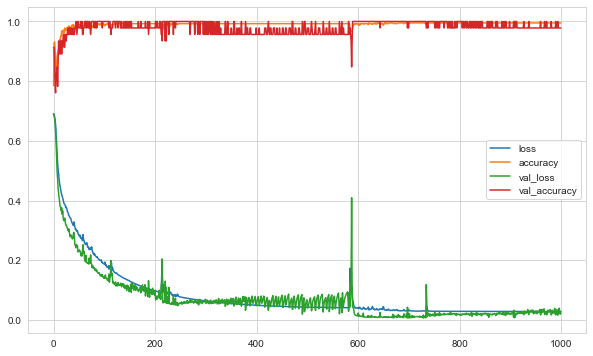

In [73]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [74]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.21937984228134155
accuracy :  0.9473684430122375


In [75]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40  2]
 [ 4 68]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [82]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train_scaled.shape[1]))
model.add(Dense(24, activation = "relu"))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation = "sigmoid"))


opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [83]:
model.fit(x= X_train_scaled, y= y_train, batch_size = 91, epochs=1000, validation_split= 0.1)

Epoch 1/1000
5/5 [==============================] - 1s 75ms/step - loss: 0.6928 - accuracy: 0.6064 - val_loss: 0.6920 - val_accuracy: 0.8913
Epoch 2/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.6913 - accuracy: 0.8924 - val_loss: 0.6908 - val_accuracy: 0.8696
Epoch 3/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.6898 - accuracy: 0.8484 - val_loss: 0.6896 - val_accuracy: 0.8261
Epoch 4/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.6879 - accuracy: 0.9120 - val_loss: 0.6873 - val_accuracy: 0.8913
Epoch 5/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.6856 - accuracy: 0.9291 - val_loss: 0.6848 - val_accuracy: 0.9130
Epoch 6/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.6829 - accuracy: 0.9340 - val_loss: 0.6812 - val_accuracy: 0.8913
Epoch 7/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.6795 - accuracy: 0.9389 - val_loss: 0.6767 - val_accuracy: 0.8913
Epoch 8/1000


Epoch 59/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.3707 - accuracy: 0.9756 - val_loss: 0.3087 - val_accuracy: 0.9565
Epoch 60/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.3679 - accuracy: 0.9780 - val_loss: 0.3038 - val_accuracy: 0.9783
Epoch 61/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.3657 - accuracy: 0.9853 - val_loss: 0.3021 - val_accuracy: 0.9565
Epoch 62/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.3643 - accuracy: 0.9780 - val_loss: 0.2987 - val_accuracy: 0.9783
Epoch 63/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.3622 - accuracy: 0.9829 - val_loss: 0.2968 - val_accuracy: 1.0000
Epoch 64/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.3612 - accuracy: 0.9780 - val_loss: 0.2949 - val_accuracy: 0.9783
Epoch 65/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.3594 - accuracy: 0.9804 - val_loss: 0.2911 - val_accuracy: 1.0000
Epoch 6

5/5 [==============================] - 0s 11ms/step - loss: 0.2958 - accuracy: 0.9878 - val_loss: 0.2355 - val_accuracy: 0.9783
Epoch 117/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.2916 - accuracy: 0.9902 - val_loss: 0.2303 - val_accuracy: 1.0000
Epoch 118/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2908 - accuracy: 0.9927 - val_loss: 0.2306 - val_accuracy: 1.0000
Epoch 119/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2907 - accuracy: 0.9902 - val_loss: 0.2277 - val_accuracy: 0.9783
Epoch 120/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2891 - accuracy: 0.9878 - val_loss: 0.2283 - val_accuracy: 0.9783
Epoch 121/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2873 - accuracy: 0.9902 - val_loss: 0.2304 - val_accuracy: 1.0000
Epoch 122/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2873 - accuracy: 0.9927 - val_loss: 0.2301 - val_accuracy: 1.0000
Epoch 123/1000

5/5 [==============================] - 0s 15ms/step - loss: 0.2416 - accuracy: 0.9902 - val_loss: 0.1860 - val_accuracy: 1.0000
Epoch 174/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.2413 - accuracy: 0.9902 - val_loss: 0.1868 - val_accuracy: 1.0000
Epoch 175/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.2363 - accuracy: 0.9951 - val_loss: 0.1989 - val_accuracy: 0.9783
Epoch 176/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2409 - accuracy: 0.9878 - val_loss: 0.1839 - val_accuracy: 1.0000
Epoch 177/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.2401 - accuracy: 0.9902 - val_loss: 0.1822 - val_accuracy: 1.0000
Epoch 178/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2352 - accuracy: 0.9878 - val_loss: 0.1908 - val_accuracy: 0.9783
Epoch 179/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.2344 - accuracy: 0.9902 - val_loss: 0.1822 - val_accuracy: 1.0000
Epoch 180/1000


5/5 [==============================] - 0s 12ms/step - loss: 0.1985 - accuracy: 0.9927 - val_loss: 0.1566 - val_accuracy: 0.9783
Epoch 231/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.1974 - accuracy: 0.9927 - val_loss: 0.1531 - val_accuracy: 1.0000
Epoch 232/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.1973 - accuracy: 0.9902 - val_loss: 0.1555 - val_accuracy: 0.9783
Epoch 233/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.1974 - accuracy: 0.9927 - val_loss: 0.1508 - val_accuracy: 1.0000
Epoch 234/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.1953 - accuracy: 0.9927 - val_loss: 0.1656 - val_accuracy: 0.9783
Epoch 235/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.1960 - accuracy: 0.9927 - val_loss: 0.1472 - val_accuracy: 1.0000
Epoch 236/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1983 - accuracy: 0.9927 - val_loss: 0.1485 - val_accuracy: 1.0000
Epoch 237/1000
5

5/5 [==============================] - 0s 14ms/step - loss: 0.1693 - accuracy: 0.9927 - val_loss: 0.1351 - val_accuracy: 0.9783
Epoch 288/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.1699 - accuracy: 0.9902 - val_loss: 0.1233 - val_accuracy: 1.0000
Epoch 289/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.1739 - accuracy: 0.9902 - val_loss: 0.1220 - val_accuracy: 1.0000
Epoch 290/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.1688 - accuracy: 0.9927 - val_loss: 0.1328 - val_accuracy: 0.9783
Epoch 291/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.1811 - accuracy: 0.9804 - val_loss: 0.1210 - val_accuracy: 1.0000
Epoch 292/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.1734 - accuracy: 0.9878 - val_loss: 0.1404 - val_accuracy: 1.0000
Epoch 293/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1763 - accuracy: 0.9878 - val_loss: 0.1226 - val_accuracy: 1.0000
Epoch 294/1000

5/5 [==============================] - 0s 11ms/step - loss: 0.1407 - accuracy: 0.9951 - val_loss: 0.1149 - val_accuracy: 1.0000
Epoch 345/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1406 - accuracy: 0.9951 - val_loss: 0.1087 - val_accuracy: 1.0000
Epoch 346/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.1405 - accuracy: 0.9951 - val_loss: 0.1104 - val_accuracy: 1.0000
Epoch 347/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.1398 - accuracy: 0.9951 - val_loss: 0.1155 - val_accuracy: 1.0000
Epoch 348/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.1414 - accuracy: 0.9927 - val_loss: 0.1119 - val_accuracy: 1.0000
Epoch 349/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1399 - accuracy: 0.9951 - val_loss: 0.1016 - val_accuracy: 1.0000
Epoch 350/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.1410 - accuracy: 0.9927 - val_loss: 0.1259 - val_accuracy: 0.9783
Epoch 351/1000

5/5 [==============================] - 0s 19ms/step - loss: 0.1212 - accuracy: 0.9951 - val_loss: 0.0972 - val_accuracy: 1.0000
Epoch 402/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.1213 - accuracy: 0.9951 - val_loss: 0.0928 - val_accuracy: 1.0000
Epoch 403/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.1206 - accuracy: 0.9951 - val_loss: 0.0866 - val_accuracy: 1.0000
Epoch 404/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.1208 - accuracy: 0.9951 - val_loss: 0.0903 - val_accuracy: 1.0000
Epoch 405/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.1212 - accuracy: 0.9927 - val_loss: 0.0935 - val_accuracy: 1.0000
Epoch 406/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1198 - accuracy: 0.9951 - val_loss: 0.0881 - val_accuracy: 1.0000
Epoch 407/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.1193 - accuracy: 0.9951 - val_loss: 0.0911 - val_accuracy: 1.0000
Epoch 408/1000


5/5 [==============================] - 0s 10ms/step - loss: 0.1048 - accuracy: 0.9951 - val_loss: 0.0794 - val_accuracy: 1.0000
Epoch 459/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.1046 - accuracy: 0.9951 - val_loss: 0.0823 - val_accuracy: 1.0000
Epoch 460/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.1042 - accuracy: 0.9951 - val_loss: 0.0842 - val_accuracy: 1.0000
Epoch 461/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.1039 - accuracy: 0.9951 - val_loss: 0.0824 - val_accuracy: 1.0000
Epoch 462/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.1036 - accuracy: 0.9951 - val_loss: 0.0872 - val_accuracy: 1.0000
Epoch 463/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.1035 - accuracy: 0.9951 - val_loss: 0.0821 - val_accuracy: 1.0000
Epoch 464/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.1033 - accuracy: 0.9951 - val_loss: 0.0819 - val_accuracy: 1.0000
Epoch 465/1000

5/5 [==============================] - 0s 12ms/step - loss: 0.0916 - accuracy: 0.9951 - val_loss: 0.0885 - val_accuracy: 0.9783
Epoch 516/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0916 - accuracy: 0.9951 - val_loss: 0.0808 - val_accuracy: 1.0000
Epoch 517/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.0913 - accuracy: 0.9951 - val_loss: 0.0771 - val_accuracy: 1.0000
Epoch 518/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0911 - accuracy: 0.9951 - val_loss: 0.0856 - val_accuracy: 0.9783
Epoch 519/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.0910 - accuracy: 0.9951 - val_loss: 0.0838 - val_accuracy: 0.9783
Epoch 520/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0910 - accuracy: 0.9951 - val_loss: 0.0719 - val_accuracy: 1.0000
Epoch 521/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0906 - accuracy: 0.9951 - val_loss: 0.0886 - val_accuracy: 0.9783
Epoch 522/1000


5/5 [==============================] - 0s 14ms/step - loss: 0.0810 - accuracy: 0.9951 - val_loss: 0.0831 - val_accuracy: 0.9783
Epoch 573/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.0809 - accuracy: 0.9951 - val_loss: 0.0768 - val_accuracy: 0.9783
Epoch 574/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.0809 - accuracy: 0.9951 - val_loss: 0.0837 - val_accuracy: 0.9783
Epoch 575/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.0804 - accuracy: 0.9951 - val_loss: 0.1051 - val_accuracy: 0.9565
Epoch 576/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0804 - accuracy: 0.9951 - val_loss: 0.0887 - val_accuracy: 0.9565
Epoch 577/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0803 - accuracy: 0.9951 - val_loss: 0.0747 - val_accuracy: 1.0000
Epoch 578/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0801 - accuracy: 0.9951 - val_loss: 0.0836 - val_accuracy: 0.9783
Epoch 579/1000

5/5 [==============================] - 0s 14ms/step - loss: 0.0722 - accuracy: 0.9951 - val_loss: 0.0850 - val_accuracy: 0.9565
Epoch 630/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0721 - accuracy: 0.9951 - val_loss: 0.0929 - val_accuracy: 0.9565
Epoch 631/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0719 - accuracy: 0.9951 - val_loss: 0.1033 - val_accuracy: 0.9565
Epoch 632/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0718 - accuracy: 0.9951 - val_loss: 0.0896 - val_accuracy: 0.9565
Epoch 633/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0717 - accuracy: 0.9951 - val_loss: 0.0824 - val_accuracy: 0.9565
Epoch 634/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0716 - accuracy: 0.9951 - val_loss: 0.0869 - val_accuracy: 0.9565
Epoch 635/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0714 - accuracy: 0.9951 - val_loss: 0.0952 - val_accuracy: 0.9565
Epoch 636/1000

5/5 [==============================] - 0s 12ms/step - loss: 0.0650 - accuracy: 0.9951 - val_loss: 0.1063 - val_accuracy: 0.9565
Epoch 687/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0650 - accuracy: 0.9951 - val_loss: 0.0654 - val_accuracy: 0.9783
Epoch 688/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0651 - accuracy: 0.9951 - val_loss: 0.0720 - val_accuracy: 0.9783
Epoch 689/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0647 - accuracy: 0.9951 - val_loss: 0.1060 - val_accuracy: 0.9565
Epoch 690/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0650 - accuracy: 0.9951 - val_loss: 0.0832 - val_accuracy: 0.9565
Epoch 691/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0648 - accuracy: 0.9951 - val_loss: 0.0560 - val_accuracy: 1.0000
Epoch 692/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0650 - accuracy: 0.9951 - val_loss: 0.0883 - val_accuracy: 0.9565
Epoch 693/1000

5/5 [==============================] - 0s 9ms/step - loss: 0.0590 - accuracy: 0.9951 - val_loss: 0.0672 - val_accuracy: 0.9783
Epoch 744/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0589 - accuracy: 0.9951 - val_loss: 0.0862 - val_accuracy: 0.9565
Epoch 745/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0588 - accuracy: 0.9951 - val_loss: 0.1055 - val_accuracy: 0.9565
Epoch 746/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0587 - accuracy: 0.9951 - val_loss: 0.0902 - val_accuracy: 0.9565
Epoch 747/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0586 - accuracy: 0.9951 - val_loss: 0.0821 - val_accuracy: 0.9565
Epoch 748/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0585 - accuracy: 0.9951 - val_loss: 0.0824 - val_accuracy: 0.9565
Epoch 749/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0584 - accuracy: 0.9951 - val_loss: 0.0901 - val_accuracy: 0.9565
Epoch 750/1000


5/5 [==============================] - 0s 9ms/step - loss: 0.0539 - accuracy: 0.9951 - val_loss: 0.0802 - val_accuracy: 0.9565
Epoch 801/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.0539 - accuracy: 0.9951 - val_loss: 0.0827 - val_accuracy: 0.9565
Epoch 802/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.0538 - accuracy: 0.9951 - val_loss: 0.0925 - val_accuracy: 0.9565
Epoch 803/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0537 - accuracy: 0.9951 - val_loss: 0.1023 - val_accuracy: 0.9565
Epoch 804/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0536 - accuracy: 0.9951 - val_loss: 0.0836 - val_accuracy: 0.9565
Epoch 805/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.0536 - accuracy: 0.9951 - val_loss: 0.0746 - val_accuracy: 0.9565
Epoch 806/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.0535 - accuracy: 0.9951 - val_loss: 0.0834 - val_accuracy: 0.9565
Epoch 807/1000
5/5 

5/5 [==============================] - 0s 9ms/step - loss: 0.0511 - accuracy: 0.9951 - val_loss: 0.0496 - val_accuracy: 0.9783
Epoch 858/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0509 - accuracy: 0.9951 - val_loss: 0.0376 - val_accuracy: 1.0000
Epoch 859/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.0500 - accuracy: 0.9951 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 860/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0500 - accuracy: 0.9951 - val_loss: 0.0348 - val_accuracy: 1.0000
Epoch 861/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0499 - accuracy: 0.9951 - val_loss: 0.0361 - val_accuracy: 1.0000
Epoch 862/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0498 - accuracy: 0.9951 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 863/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.0498 - accuracy: 0.9951 - val_loss: 0.0366 - val_accuracy: 1.0000
Epoch 864/1000
5/

5/5 [==============================] - 0s 10ms/step - loss: 0.0464 - accuracy: 0.9951 - val_loss: 0.0484 - val_accuracy: 0.9783
Epoch 915/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.0464 - accuracy: 0.9951 - val_loss: 0.0490 - val_accuracy: 0.9783
Epoch 916/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.0463 - accuracy: 0.9951 - val_loss: 0.0465 - val_accuracy: 0.9783
Epoch 917/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.0463 - accuracy: 0.9951 - val_loss: 0.0475 - val_accuracy: 0.9783
Epoch 918/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0462 - accuracy: 0.9951 - val_loss: 0.0485 - val_accuracy: 0.9783
Epoch 919/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.0461 - accuracy: 0.9951 - val_loss: 0.0454 - val_accuracy: 0.9783
Epoch 920/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0461 - accuracy: 0.9951 - val_loss: 0.0457 - val_accuracy: 0.9783
Epoch 921/1000
5/

5/5 [==============================] - 0s 10ms/step - loss: 0.0434 - accuracy: 0.9951 - val_loss: 0.0469 - val_accuracy: 0.9783
Epoch 972/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0433 - accuracy: 0.9951 - val_loss: 0.0492 - val_accuracy: 0.9783
Epoch 973/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0433 - accuracy: 0.9951 - val_loss: 0.0525 - val_accuracy: 0.9783
Epoch 974/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0432 - accuracy: 0.9951 - val_loss: 0.0526 - val_accuracy: 0.9783
Epoch 975/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0432 - accuracy: 0.9951 - val_loss: 0.0493 - val_accuracy: 0.9783
Epoch 976/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.0431 - accuracy: 0.9951 - val_loss: 0.0492 - val_accuracy: 0.9783
Epoch 977/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0431 - accuracy: 0.9951 - val_loss: 0.0504 - val_accuracy: 0.9783
Epoch 978/1000

In [80]:
455/5

91.0

In [84]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Early stop ve dropout yapmadan, fazladan 2 adet noron ekleyerek skorları düzelttik.

[[41  1]
 [ 4 68]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## Cross Validation

**Keras models** can be used in **scikit-learn** by wrapping them with the **KerasClassifier** or **KerasRegressor** class.

To use these wrappers you must define a function that creates and returns your Keras sequential model, then pass this function to the build_fn argument when constructing the KerasClassifier class.

The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

Normalde sklearn kütüphanesinin bir fonksiyonudur. uygulamak için scikitlearn modeli ile entegre etmek gerekmektedir.

In [85]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Binary Classification kulandığımız için KerasClassifier import ettik. regression olsaydı KerasRegressor kullanacaktık. 

In [90]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(36, activation = "relu", input_dim = X_train_scaled.shape[1]))
    classifier.add(Dense(24, activation = "relu"))
    classifier.add(Dense(18, activation = "relu"))
    classifier.add(Dense(9, activation="relu"))
    classifier.add(Dense(5, activation="relu"))
    classifier.add(Dense(2, activation = "relu"))
    classifier.add(Dense(1, activation = "sigmoid"))
    classifier.compile(optimizer = "adam" , loss = 'binary_crossentropy', metrics = ["accuracy"])
    return classifier

In [91]:
from sklearn.model_selection import cross_validate

tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)

scores = cross_validate(estimator = classifier_model, X = X_train_scaled, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]


In [92]:
df_scores.mean()
# yukarıda ki skorlarımız oldukça dengelidir.

test_accuracy    0.932
test_precision   0.933
test_recall      0.979
test_f1          0.952
dtype: float64

In [93]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary
# skorların ortalamaları ve standart sapmaları

,score_mean,score_std
acc,0.932,0.105
pre,0.933,0.107
rec,0.979,0.024
f1,0.952,0.063


## GridSearchCV

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

Bu linkten tüm gridsearch deep parametres ulaşılabilir.

### Best Optimizers: 

In [94]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [95]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(36, activation = "relu", input_dim = X_train_scaled.shape[1]))
    classifier.add(Dense(24, activation = "relu"))
    classifier.add(Dense(18, activation = "relu"))
    classifier.add(Dense(9, activation="relu"))
    classifier.add(Dense(5, activation="relu"))
    classifier.add(Dense(2, activation = "relu"))
    classifier.add(Dense(1, activation = "sigmoid"))
    classifier.compile(optimizer = "adam" , loss = 'binary_crossentropy', metrics = ["accuracy"])
    return classifier

In [96]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]

In [97]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'optimizer': [Adam, RMSprop, Adadelta, Nadam]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 6,
                          n_jobs = -1)

grid_model.fit(X_train_scaled, y_train, callbacks = [early_stop])

<IPython.core.display.Javascript object>

Epoch 1/200
13/13 [==============================] - 2s 38ms/step - loss: 0.6915 - accuracy: 0.7848 - val_loss: 0.6897 - val_accuracy: 0.9130
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6869 - accuracy: 0.9267 - val_loss: 0.6848 - val_accuracy: 0.9130
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6808 - accuracy: 0.9315 - val_loss: 0.6755 - val_accuracy: 0.8696
Epoch 4/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6710 - accuracy: 0.9046 - val_loss: 0.6589 - val_accuracy: 0.7826
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6539 - accuracy: 0.8875 - val_loss: 0.6313 - val_accuracy: 0.7609
Epoch 6/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6265 - accuracy: 0.8117 - val_loss: 0.5923 - val_accuracy: 0.8261
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 0.5931 - accuracy: 0.8337 - val_loss: 0.5410 - val_accuracy: 0.8043
Epoch 8/200


Epoch 59/200
13/13 [==============================] - 0s 7ms/step - loss: 0.2862 - accuracy: 0.9707 - val_loss: 0.2524 - val_accuracy: 0.9565
Epoch 60/200
13/13 [==============================] - 0s 7ms/step - loss: 0.2704 - accuracy: 0.9829 - val_loss: 0.2238 - val_accuracy: 0.9783
Epoch 61/200
13/13 [==============================] - 0s 7ms/step - loss: 0.2666 - accuracy: 0.9829 - val_loss: 0.2292 - val_accuracy: 0.9783
Epoch 62/200
13/13 [==============================] - 0s 7ms/step - loss: 0.2589 - accuracy: 0.9927 - val_loss: 0.2074 - val_accuracy: 1.0000
Epoch 63/200
13/13 [==============================] - 0s 7ms/step - loss: 0.2552 - accuracy: 0.9878 - val_loss: 0.1980 - val_accuracy: 1.0000
Epoch 64/200
13/13 [==============================] - 0s 7ms/step - loss: 0.2532 - accuracy: 0.9878 - val_loss: 0.1954 - val_accuracy: 1.0000
Epoch 65/200
13/13 [==============================] - 0s 7ms/step - loss: 0.2533 - accuracy: 0.9878 - val_loss: 0.2167 - val_accuracy: 0.9783
Epoch 

13/13 [==============================] - 0s 7ms/step - loss: 0.1670 - accuracy: 0.9902 - val_loss: 0.1569 - val_accuracy: 0.9783
Epoch 117/200
13/13 [==============================] - 0s 7ms/step - loss: 0.1763 - accuracy: 0.9853 - val_loss: 0.1413 - val_accuracy: 0.9783
Epoch 118/200
13/13 [==============================] - 0s 7ms/step - loss: 0.1689 - accuracy: 0.9878 - val_loss: 0.1233 - val_accuracy: 1.0000
Epoch 119/200
13/13 [==============================] - 0s 7ms/step - loss: 0.1644 - accuracy: 0.9902 - val_loss: 0.1270 - val_accuracy: 1.0000
Epoch 120/200
13/13 [==============================] - 0s 7ms/step - loss: 0.1613 - accuracy: 0.9902 - val_loss: 0.1210 - val_accuracy: 1.0000
Epoch 121/200
13/13 [==============================] - 0s 7ms/step - loss: 0.1601 - accuracy: 0.9927 - val_loss: 0.1235 - val_accuracy: 1.0000
Epoch 122/200
13/13 [==============================] - 0s 7ms/step - loss: 0.1593 - accuracy: 0.9927 - val_loss: 0.1180 - val_accuracy: 1.0000
Epoch 123/200

GridSearchCV(cv=6,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002167DB77EB0>,
             n_jobs=-1,
             param_grid={'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy')

In [141]:
grid_model.best_score_

1.0

In [98]:
grid_model.best_params_

{'optimizer': keras.optimizer_v2.adam.Adam}

### Best epochs : 

In [102]:
def create_model():
    model = Sequential()
    model.add(Dense(36, activation = "relu", input_dim = X_train_scaled.shape[1]))
    model.add(Dense(24, activation = "relu"))
    model.add(Dense(18, activation = "relu"))
    model.add(Dense(9, activation="relu"))
    model.add(Dense(5, activation="relu"))
    model.add(Dense(2, activation = "relu"))
    model.add(Dense(1, activation = "sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [103]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = create_model, validation_split = 0.1, verbose = 0)

parameters = {"epochs" : [100, 200, 400, 600, 800, 1000]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 6,
                          n_jobs = -1)

grid_model.fit(X_train_scaled, y_train)

<IPython.core.display.Javascript object>

GridSearchCV(cv=6,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021605AC4F10>,
             n_jobs=-1, param_grid={'epochs': [100, 200, 400, 600, 800, 1000]},
             scoring='accuracy')

In [104]:
grid_model.best_params_

{'epochs': 200}

### Best batch_size : 

In [105]:
def create_model():
    model = Sequential()
    model.add(Dense(36, activation = "relu", input_dim = X_train_scaled.shape[1]))
    model.add(Dense(24, activation = "relu"))
    model.add(Dense(18, activation = "relu"))
    model.add(Dense(9, activation="relu"))
    model.add(Dense(5, activation="relu"))
    model.add(Dense(2, activation = "relu"))
    model.add(Dense(1, activation = "sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [106]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = create_model, validation_split = 0.1, verbose = 0)

parameters = {"batch_size" : [10, 25, 32, 64, 80, 100]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 6,
                          n_jobs = -1)

grid_model.fit(X_train_scaled, y_train)

<IPython.core.display.Javascript object>

GridSearchCV(cv=6,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021605CC5100>,
             n_jobs=-1, param_grid={'batch_size': [10, 25, 32, 64, 80, 100]},
             scoring='accuracy')

In [107]:
grid_model.best_params_

{'batch_size': 10}

### best learning_rate : 

In [125]:
def create_model(learn_rate=0.001):
    model = Sequential()
    model.add(Dense(36, activation = "relu", input_dim = X_train_scaled.shape[1]))
    model.add(Dense(24, activation = "relu"))
    model.add(Dense(18, activation = "relu"))
    model.add(Dense(9, activation="relu"))
    model.add(Dense(5, activation="relu"))
    model.add(Dense(2, activation = "relu"))
    model.add(Dense(1, activation = "sigmoid"))
    optimizer = Adam(lr=learn_rate) # en iyi Adam çıktığı için onu seçtik
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [126]:
model = KerasClassifier(build_fn=create_model, epochs=200, batch_size=10, verbose=0)

In [127]:
learn_rate = [0.001, 0.003, 0.005]
param_grid = dict(learn_rate=learn_rate)
grid_model = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=6)
grid_model.fit(X_train_scaled, y_train)

<IPython.core.display.Javascript object>

GridSearchCV(cv=6,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002160720A700>,
             n_jobs=-1, param_grid={'learn_rate': [0.001, 0.003, 0.005]})

In [128]:
grid_model.best_params_

{'learn_rate': 0.003}

In [129]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [130]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[41  1]
 [ 1 71]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Train_Set
[[168   2]
 [  0 285]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       170
           1       0.99      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      0.99      1.00       455
weighted avg       1.00      1.00      1.00       455



Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

## ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

### for keras models

In [ ]:
#plot_roc_curve(model, X_test, y_test); # it gives an error because of the Sequential model

In [131]:
from sklearn.metrics import roc_auc_score, roc_curve

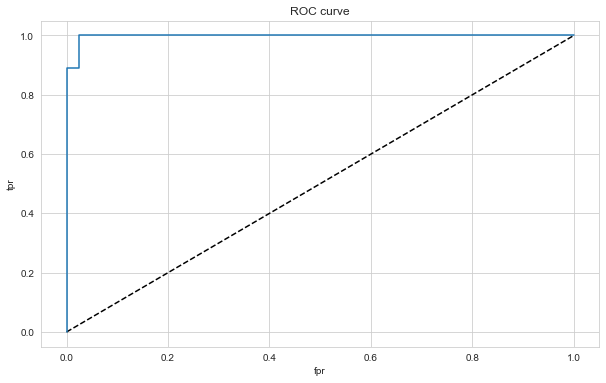

In [142]:
y_pred_proba = grid_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()
# 0 ve 1 leri birbirinden ayırıp doğru bilme olasılığı

In [143]:
roc_auc_score(y_test, y_pred_proba)
# 0 ve 1 leri ayırıp doğru bilme olasılığı

0.9973544973544973

## Comparison with ML : 

### Logistic Regression : 

In [155]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = seed)
model.fit(X_train_scaled, y_train)
eval_metric(model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[39  3]
 [ 1 71]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Train_Set
[[157  13]
 [  1 284]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       170
           1       0.96      1.00      0.98       285

    accuracy                           0.97       455
   macro avg       0.97      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455



In [157]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

operations = [("scaler", MinMaxScaler()), ("logistic", LogisticRegression(random_state= seed))]
Pipeline(steps=operations)
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.955
test_recall      0.997
test_f1          0.975
test_accuracy    0.967
dtype: float64

### Random Forest : 

In [158]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
eval_metric(model, X_train, y_train, X_test, y_test)

Test_Set
[[39  3]
 [ 3 69]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Train_Set
[[170   0]
 [  0 285]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [159]:
model = RandomForestClassifier(random_state = seed)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.973
test_recall      0.976
test_f1          0.974
test_accuracy    0.967
dtype: float64

### AdaBoost : 

In [152]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)
eval_metric(model, X_train, y_train, X_test, y_test)

Test_Set
[[39  3]
 [ 2 70]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Train_Set
[[170   0]
 [  0 285]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [160]:
model = AdaBoostClassifier(random_state = seed)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.966
test_recall      0.975
test_f1          0.970
test_accuracy    0.963
dtype: float64

### GradientBoosting : 

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
eval_metric(model, X_train, y_train, X_test, y_test)

Test_Set
[[38  4]
 [ 3 69]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Train_Set
[[170   0]
 [  0 285]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [161]:
model = GradientBoostingClassifier(random_state = seed)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.962
test_recall      0.968
test_f1          0.965
test_accuracy    0.956
dtype: float64

### Xgboost : 

In [163]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state = seed)
model.fit(X_train, y_train)
eval_metric(model, X_train, y_train, X_test, y_test)

[20:27:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test_Set
[[38  4]
 [ 0 72]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


Train_Set
[[170   0]
 [  0 285]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [164]:
model = XGBClassifier(random_state = seed)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[20:27:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

test_precision   0.966
test_recall      0.979
test_f1          0.972
test_accuracy    0.965
dtype: float64

## Loading Model and Scaler

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_cancer = load_model('model_cancer.h5')
scaler_cancer = pickle.load(open("scaler_cancer", "rb"))

## Prediction

In [ ]:
single_patient = df.drop('Cancer', axis = 1).iloc[0:1, :]
single_patient

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,0.162,0.666,0.712,0.265,0.460,0.119


In [ ]:
single_patient = scaler_cancer.transform(single_patient)
single_patient

array([[0.52103744, 0.0226581 , 0.68000973, 0.7920373 , 0.70313964,
        0.73111332, 0.68636364, 0.60551811, 0.35614702, 0.12046941,
        0.15929565, 0.35139844, 0.13568182, 0.30062512, 0.31164518,
        0.18304244, 0.62077552, 0.14152452, 0.61828432, 0.61929156,
        0.56861022, 0.91202749, 0.59846245, 0.41886396]])

In [ ]:
(model_cancer.predict(single_patient) > 0.5).astype("int32")
#model_cancer.predict_classes(single_patient)

array([[0]], dtype=int32)

In [ ]:
df["Cancer"].iloc[0]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___